In [1]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import PorterStemmer # for stemming
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split , cross_val_score,KFold
from collections import Counter


from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import warnings
!pip install imblearn
import imblearn
warnings.filterwarnings("ignore")

In [3]:
from keras.datasets import imdb
import pandas as pd
import numpy as np
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers import Embedding
from keras.models import Model
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
from keras.models import Sequential
#from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Bidirectional

#%matplotlib inline


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
#%%---------Data Read & Transformation---------

#Data Reading for Davidson Dataset
nRowsRead = None # specify 'None' to read complete file
#df = pd.read_csv('/content/drive/MyDrive/temp_files/hate and offensive/train-augmentation.csv', delimiter=',', nrows = nRowsRead,encoding = "ISO-8859-1")
df = pd.read_csv('Train-Augmentation.csv', delimiter=',', nrows = nRowsRead,encoding = "ISO-8859-1")
nRow, nCol = df.shape
print('There are {} rows and {} columns'.format(nRow, nCol))


There are 8577 rows and 2 columns


In [10]:
df['label'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
8572    0
8573    0
8574    0
8575    0
8576    0
Name: label, Length: 8577, dtype: int64>

In [11]:
x = df['tweet']
y = df['label']

In [12]:
token = Tokenizer()

In [13]:
token.fit_on_texts(x)
seq = token.texts_to_sequences(x)

In [14]:
pad_seq = pad_sequences(seq,maxlen=300)
vocab_size = len(token.word_index)+1
x = df['tweet']
y = df['label']

In [15]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2025-01-22 08:19:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-22 08:19:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-22 08:19:58--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [16]:
from keras.initializers import Constant
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer

#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
embedding_vector = {}
f=open("glove.6B.100d.txt",encoding="utf-8")



In [17]:
for line in tqdm(f):
    value = line.split(' ')
    word = value[0]
    coef = np.array(value[1:],dtype = 'float32')
    embedding_vector[word] = coef

400000it [00:16, 24163.95it/s]


In [18]:
embedding_matrix = np.zeros((vocab_size,100))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|██████████| 19110/19110 [00:00<00:00, 348516.20it/s]


Class=1, n=2859 (33.333%)
Class=2, n=2859 (33.333%)
Class=0, n=2859 (33.333%)


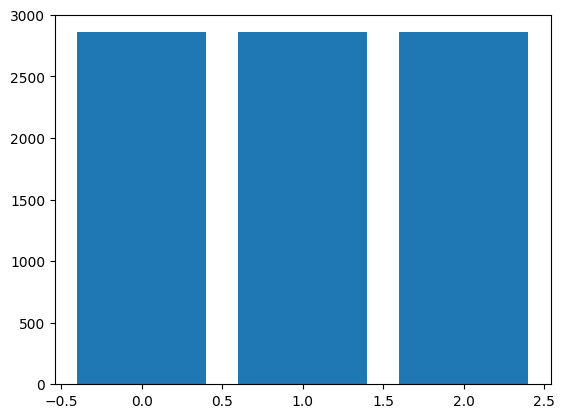

In [19]:
y = df['label']
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [20]:
from keras.utils import to_categorical

num_classes = 3

y_one_hot = to_categorical(y, num_classes=num_classes)


In [ ]:
modelLSTMGL = Sequential()
modelLSTMGL.add(Embedding(vocab_size,100,weights = [embedding_matrix],input_length=300,trainable = False))


In [21]:
# Reading validation data from separate CSV file
df_val = pd.read_csv('Validation.csv', delimiter=',', nrows = nRowsRead, encoding="ISO-8859-1")
x_val = df_val['tweet']
y_val = df_val['label']
seq_val = token.texts_to_sequences(x_val)
pad_seq_val = pad_sequences(seq_val, maxlen=300)

In [22]:
# Convert y_val to one-hot encoding
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)

In [23]:
# Train and validation split
X_train = pad_seq
X_val = pad_seq_val
y_train = y_one_hot
y_val = y_val_one_hot

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers import Embedding,Bidirectional
from keras.models import Model


In [25]:
# Model construction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

modelLSTMGL = Sequential()
modelLSTMGL.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=300, trainable=False))
modelLSTMGL.add(Bidirectional(LSTM(25)))
modelLSTMGL.add(Dense(16, activation='relu'))
modelLSTMGL.add(Dense(num_classes, activation='softmax'))  # Softmax for multi-class classification
modelLSTMGL.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model with the validation data from the separate CSV
history = modelLSTMGL.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 74s 259ms/step - accuracy: 0.5920 - loss: 0.8926 - val_accuracy: 0.8352 - val_loss: 0.5131
Epoch 2/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 69s 256ms/step - accuracy: 0.8178 - loss: 0.4747 - val_accuracy: 0.7808 - val_loss: 0.6357
Epoch 3/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 79s 246ms/step - accuracy: 0.8474 - loss: 0.4092 - val_accuracy: 0.7898 - val_loss: 0.5924
Epoch 4/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 77s 288ms/step - accuracy: 0.8516 - loss: 0.3837 - val_accuracy: 0.8191 - val_loss: 0.5078
Epoch 5/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 69s 257ms/step - accuracy: 0.8721 - loss: 0.3414 - val_accuracy: 0.8416 - val_loss: 0.4695
Epoch 6/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 80s 248ms/step - accuracy: 0.8817 - loss: 0.3259 - val_accuracy: 0.8362 - val_loss: 0.4807
Epoch 7/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 90s 278ms/step - accuracy: 0.8848 - loss: 0.3126 - val_accuracy: 0.8682 - val_loss: 0.3549
Epoch 8/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 74s 275ms/step - accuracy: 0.8794 - loss: 0

In [26]:
values = history.history

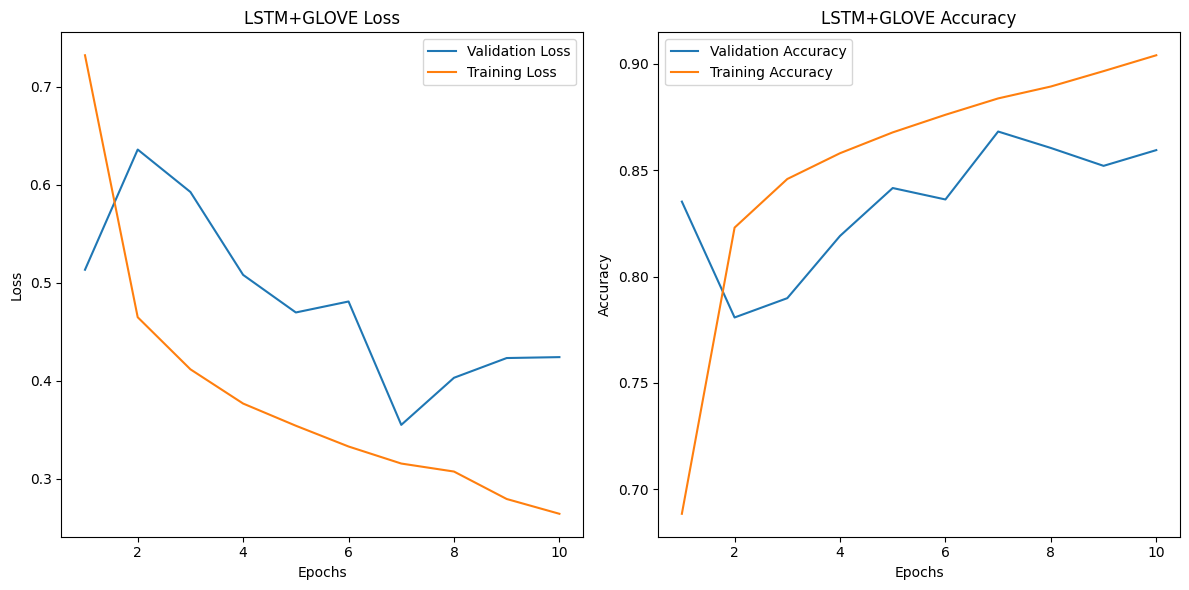

In [27]:
epoch_count = 10

# اطمینان حاصل کنید که تعداد عناصر در val_loss و epochs یکسان باشند
val_loss = values['val_loss'][:epoch_count]
training_loss = values['loss']
training_acc = values['accuracy']
validation_acc = values['val_accuracy']
epochs = range(1, epoch_count + 1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, val_loss, label='Validation Loss')
plt.plot(epochs, training_loss, label='Training Loss')
plt.title('LSTM+GLOVE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# نمودار Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, validation_acc, label='Validation Accuracy')
plt.plot(epochs, training_acc, label='Training Accuracy')
plt.title('LSTM+GLOVE Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# نمودارها را نشان بده
plt.tight_layout()
plt.show()


In [28]:
from sklearn.metrics import precision_score,recall_score,accuracy_score, f1_score
def show_confusion(pred_label,label,nm):
  class_names=['Hate','Ofensive','Neither']
  cm=confusion_matrix(label,pred_label)
  disp =ConfusionMatrixDisplay(cm,display_labels=class_names)
  disp.plot()
  plt.title(f'Confusion Matrix {nm} ')

  plt.xlabel('Actual ')
  plt.ylabel('Predicted ')
  plt.show()

def mymetrics(Y,P,alg = None):
    recall= recall_score(Y, P, average='macro')
    acc2= accuracy_score(Y, P)
    precision= precision_score(Y, P, average='macro')
    Fmeasure = f1_score(Y, P, average='macro')


In [30]:
# پیش‌بینی مدل بر روی داده‌های آموزش و اعتبارسنجی (به‌عنوان تست)
ptrLstm = modelLSTMGL.predict(X_train)
ptsLstm = modelLSTMGL.predict(X_val)  # از X_val به‌عنوان داده‌های تست استفاده می‌کنیم

ptrLstm = (ptrLstm > 0.5)
ptsLstm = (ptsLstm > 0.5)

# تبدیل به نوع داده float
ptrLstm = ptrLstm.astype(float)
ptsLstm = ptsLstm.astype(float)


269/269 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step


In [31]:
from sklearn.metrics import classification_report

In [35]:
# استخراج برچسب‌ها از y_val برای ارزیابی
y_val_labels = y_val.argmax(axis=1)  # تبدیل به برچسب‌های اصلی
ptsLstm_labels = ptsLstm.argmax(axis=1)  # پیش‌بینی‌های مدل را به برچسب‌ها تبدیل می‌کنیم

# حالا می‌توانید عملکرد مدل را ارزیابی کنید
mymetrics(y_val_labels, ptsLstm_labels)  # ارزیابی مدل بر روی داده‌های اعتبارسنجی

===== : Validation Lstm+GLOVE : =====


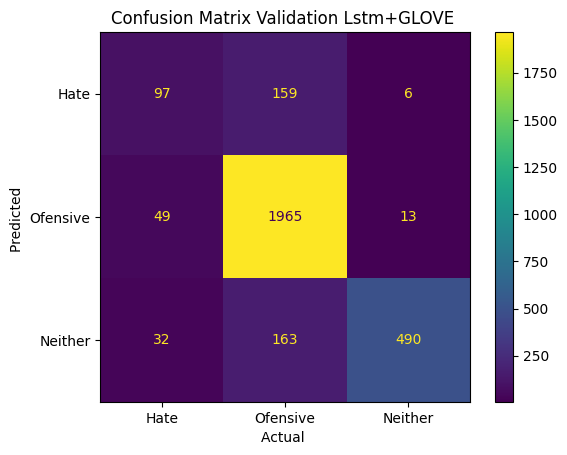

In [37]:
# اگر از X_val استفاده می‌کنید، باید از y_val_labels استفاده کنید.
print("===== : Validation Lstm+GLOVE : =====")
mymetrics(y_val_labels, ptsLstm_labels)  # ارزیابی مدل با استفاده از y_val_labels
show_confusion(y_val_labels, ptsLstm_labels, 'Validation Lstm+GLOVE')  # نمایش ماتریس اشتباه


In [39]:
from sklearn.metrics import classification_report

# اگر از X_val استفاده می‌کنید، باید از y_val_labels به جای y_test_labels استفاده کنید
c = classification_report(y_val_labels, ptsLstm_labels, digits=4)

print(c)


              precision    recall  f1-score   support

           0     0.3702    0.5449    0.4409       178
           1     0.9694    0.8592    0.9110      2287
           2     0.7153    0.9627    0.8208       509

    accuracy                         0.8581      2974
   macro avg     0.6850    0.7889    0.7242      2974
weighted avg     0.8901    0.8581    0.8674      2974



In [40]:
#%%---------Data Read & Transformation---------

#Data Reading for Davidson Dataset
nRowsRead = None # specify 'None' to read complete file
#testing = pd.read_fwf('/content/drive/MyDrive/temp_files/hate and offensive/Test.csv', delimiter=',', nrows = nRowsRead,encoding = "ISO-8859-1")
testing = pd.read_csv('Test.csv', delimiter=',', nrows = nRowsRead,encoding = "ISO-8859-1")
nRow, nCol = testing.shape
print('There are {} rows and {} columns'.format(nRow, nCol))


testing.head(10)


There are 4957 rows and 2 columns


,label,tweet
0,2,RT @paulabruederle: Some birds aren't meant to...
1,1,RT @paullowry42: @gingerash2013 lol and your r...
2,1,RT @paymon_d: Legendary year. RT @1stName_Brav...
3,1,RT @peaceloveweed_: These hoes want my belvita...
4,2,"RT @peeabut: Dear god, make me a bird so I can..."
5,1,RT @peeper1016: If preferring to be barefoot m...
6,1,RT @peidroh: when you tell the chick-fil-a cas...
7,2,"RT @pekholt: Raven Symone's hair be like, ""I'm..."
8,2,RT @pellucidstyles: they might be called 5 sec...
9,1,RT @petertrvjillo: Listen here you beautiful b...


In [41]:
x_test = testing['tweet']


In [42]:
x_test = token.texts_to_sequences(x_test)

In [43]:
testing_seq = pad_sequences(x_test,maxlen=300)


In [44]:
predic = modelLSTMGL.predict(testing_seq)

155/155 ━━━━━━━━━━━━━━━━━━━━ 15s 99ms/step


In [45]:
# preds=[]
# for i in predic:
#   preds.append(0 if i<0.5 else 1)
preds=(predic>0.5)
preds=preds.astype(float)

In [46]:
pred_labels = np.argmax(preds, axis=1)

===== : Test Lstm+GLOVE : =====


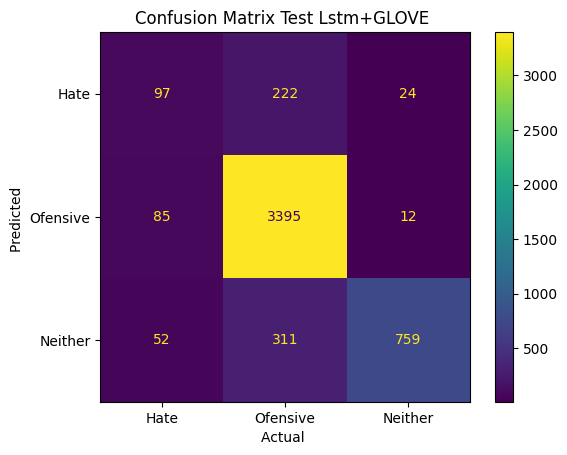

In [47]:
print("===== : Test Lstm+GLOVE : =====")
mymetrics(testing['label'],pred_labels)
show_confusion(testing['label'] ,pred_labels,'Test Lstm+GLOVE')

In [ ]:
report = classification_report(testing['label'], pred_labels, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.1892    0.6111    0.2889       234
           1     0.9762    0.8363    0.9009      3928
           2     0.7895    0.8302    0.8093       795

    accuracy                         0.8247      4957
   macro avg     0.6516    0.7592    0.6664      4957
weighted avg     0.9091    0.8247    0.8573      4957



In [48]:
# اضافه کردن ستون‌های جدید به دیتافریم داده تست
testing['predicted_label'] = pred_labels  # لیبل‌های پیش‌بینی شده
testing['true_label'] = testing['label']  # لیبل‌های واقعی

# انتخاب ستون‌های موردنظر (توییت، لیبل واقعی و لیبل پیش‌بینی شده)
output_df = testing[['tweet', 'true_label', 'predicted_label']]

# ذخیره به فایل CSV
output_df.to_csv('LSTM_predictions.csv', index=False, encoding='utf-8')

print("فایل LSTM_predictions.csv با موفقیت ذخیره شد.")


فایل LSTM_predictions.csv با موفقیت ذخیره شد.
